In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Function to apply intensity transformation to a single pixel
def transform_pixel_intensity(pixel_value: int):
    # Apply a linear transformation for pixel values in the range [50, 150]
    if 50 <= pixel_value <= 150:
        return 155 / 100 * pixel_value + 22.5
    else:
        return pixel_value

# Function to apply intensity transformation to the entire image
def apply_intensity_transformation(image: np.ndarray):
    transformed_image = np.zeros(image.shape, dtype=np.uint8)

    # Iterate over each pixel and apply the transformation
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            transformed_image[row, col] = transform_pixel_intensity(image[row, col])
    
    return transformed_image

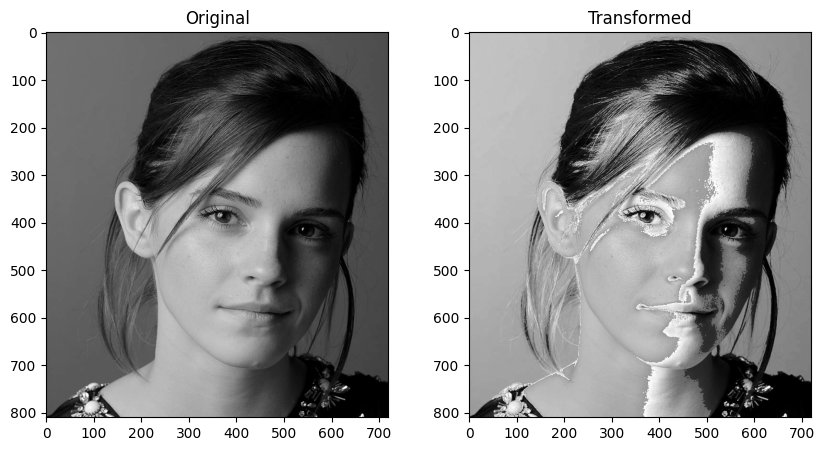

In [12]:
# Load the grayscale image
img = cv2.imread("a1images/emma.jpg", cv2.IMREAD_GRAYSCALE)

# Apply the intensity transformation function to the image
transformed_img = apply_intensity_transformation(img)

# Plot the original and transformed images 
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Transformed")
plt.imshow(transformed_img, cmap='gray')

plt.show()

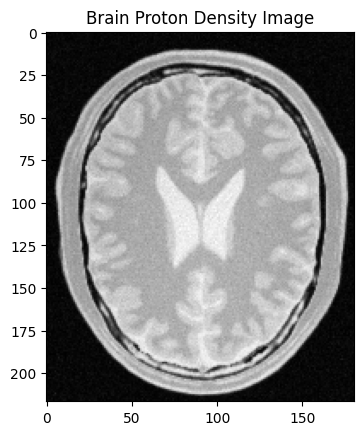

(217, 181)


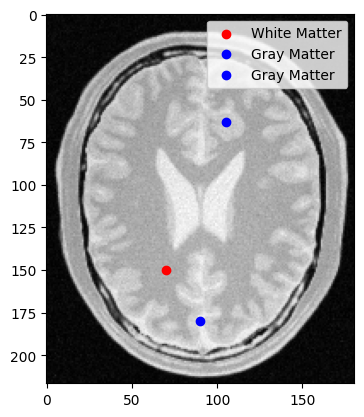

White Matter Intensity: 194
Gray Matter Intensity: 173


In [22]:
# Load the brain proton density image
brain_img = cv2.imread("a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(brain_img, cmap='gray')
plt.title("Brain Proton Density Image")
plt.show()

# Print the shape of the image
print(brain_img.shape)  # Output: (217, 181)

# Define points for white and gray matter
wm_point_1 = (70, 150)
wm_point_2 = (150, 150)
gm_point_1 = (105, 63)
gm_point_2 = (90, 180)


# Show points on the brain image
plt.imshow(brain_img, cmap="gray")
plt.scatter(*wm_point_1, color='red', label='White Matter')
plt.scatter(*gm_point_1, color='blue', label='Gray Matter')
plt.scatter(*gm_point_2, color='blue', label='Gray Matter')
plt.legend()
plt.show()

# Extract pixel intensities
wm_intensity = brain_img[wm_point_1]
gm_intensity = brain_img[gm_point_1]

# Print pixel intensities
print(f"White Matter Intensity: {wm_intensity}")
print(f"Gray Matter Intensity: {gm_intensity}")